---
layout: default
title: "Deep Learning - RNN architectures"
categories: deeplearning
permalink: /ML44/
order: 44
comments: true
---

In [21]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"
from matplotlib.patches import Rectangle, Circle
from mpl_flow import Flow

Populating the interactive namespace from numpy and matplotlib


In [228]:
def many_to_one(ax):
#     ax.set_title('Many to One', fontsize=11)
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, 6):
        lbl = i if i < 5 else 'T_x'

        if i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i >0 and i != 4:
            f.node(f'x{i}', label=f'$x^{{\\langle {lbl} \\rangle}}$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none'))

    f.node(f'y{i}', label=f'$\\hat{{y}}$', startpoint=f'a{i}', travel='n', fontsize=13,
           bbox=dict(ec='none'))

def many_to_many(ax, steps):
#     howmuch = 'Many' if steps > 1 else 'One'
#     ax.set_title(f'{howmuch} to {howmuch}', fontsize=11)
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, steps+1):
        lbl = i if i < 5 else 'T_x'

        if i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i >0 and i != 4:
            supscript = f'^{{\\langle {lbl} \\rangle}}' if steps > 1 else ''
            f.node(f'x{i}', label=f'$x{supscript}$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none')) 
            if i == 5:
                lbl = 'T_y'
                supscript = f'^{{\\langle {lbl} \\rangle}}' if steps > 1 else ''
            f.node(f'y{i}', label=f'$\\hat{{y}}{supscript}$', startpoint=f'a{i}', travel='n', fontsize=13,
                   bbox=dict(ec='none'))

def one_to_many(ax):
#     ax.set_title('One to Many', fontsize=11)
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, 6):
        lbl = i if i < 5 else 'T_x'

        if i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i == 1:
            f.node(f'x{i}', label=f'$x$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none')) 
        if i > 0 and i != 4:
            lbl = lbl if i != 5 else 'T_y'
            f.node(f'y{i}', label=f'$\\hat{{y}}^{{\\langle {lbl} \\rangle}}$', startpoint=f'a{i}', travel='n', fontsize=13,
                   bbox=dict(ec='none'))
            

        if i > 1 and i < 4:
            f.edge(f'y{i-1}', f'a{i}', headport='s', tailport='s', 
                   arrowprops=dict(connectionstyle='arc,angleA=-110,angleB=-10,armA=30,armB=10,rad=10', shrinkA=10, shrinkB=10, ec='r'))

# RNN architectures
In <a href="page:ML43">ML-43</a> we have seen an RNN architecture where $T_x = T_y$. For most applications, this is not the case and the basic RNN architecture that we have seen in <a href="page:ML43">ML-43</a>  can be modified to map sequence-related $x$ and $y$ with different shapes.

## IO relationship
The basic RNN architecture that we have seen in <a href="page:ML43">ML-43</a> maps many input to as many outputs and it is therefore called a Many-to-Many architecture. Furthermore, in that architecture $T_x = T_y$. This condition is not always the case and other relationship balances exist: additionally to the many-to-may we have one-to-one, one-to-many and many-to-one.

### One-to-One
A one-to-one architecture maps an input $x$ to an output $y$ in a single time-step and it is a limit case, which is identical to a classical (non-recurrent) neural network <a href="#fig:oto">figure below</a>)

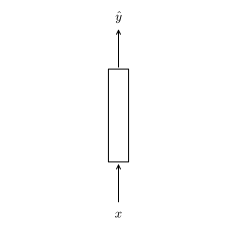

In [229]:
fig, ax = plt.subplots(figsize=(4,4))
many_to_many(ax, 1)

<i id="fig:oto">One to One RNN: an RNN with a single time step where the input $x$ passes through the network only once to produce $y$. This is equivalent to a classic (non-recursive) neural network</i>

### Many-to-One
Suppose we want to train an RNN for a sentiment classification task where, given an sentence $x$, the task is to produce a number $y$ indicating how good is the sentiment that the sentence expresses. For example, we could have movie reviews as input and the task is to tell if the review is good or bad. The words of the input review are parsed in subsequent time-steps, but only one output is produced at the end of the process (<a href="#fig:mto">figure below</a>)  This is a Many-to-One architecture where we want to map mulitple inputs (multiple words in a sentence) to a single output (the review mark).

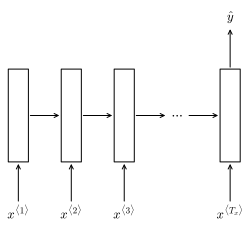

In [233]:
fig, ax = plt.subplots(figsize=(4, 4))
many_to_one(ax)

<i id="fig:mto">Many to One RNN: inputs fed through each time-step $x^{\langle t \rangle}$ concur to produce a single output $\hat{y}$</i>

### One-to-Many
Suppose we want to create a music generation algorithm, where the goal is for the RNN to output a set of notes from a single number input, representing for example the music genre. One-to-many RNN, also called **sequence generation** algorithms, usually feed the output of a time-step $\hat{y}^{\langle t \rangle}$ to the next time-step (<a href="fig:otm">figure below</a>). Sequence generative models have some more subtlety to them that are better explained in a dedicated section.

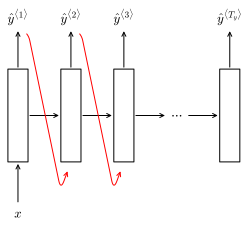

In [234]:
fig, ax =plt.subplots(figsize=(4,4))
one_to_many(ax)

<i id="fig:otm">One to Many RNN: a single (or even no) input elicit the production of a series of outputs</i>

### Many-to-Many
We have already seen a Many-to-Many RNN in <a href="page:ML43">ML-43</a>, which we used as a basic example of RNN architecture (<a href="fig:mtm">figure below</a>, panel A). Another case exists of many to many architecture, where $T_x \neq T_y$ (<a href="fig:mtm">figure below</a>, panel B). In this architecture input and output are temporally separated: a series of time-steps $[1, T_x]$ only take inputs and another series of time-steps $[1, T_y]$ only produce outputs. Since there is this clear distinction from input and output time-steps they are also referred to as the **encoder** and **decoder**, respectively: the encoder encodes the input and decoder maps the encoded input to the output.

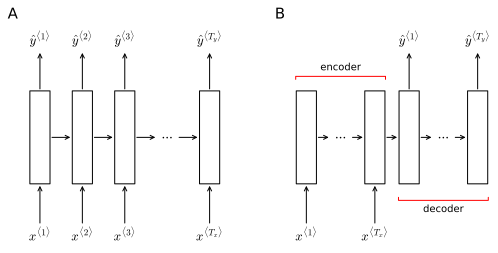

In [235]:
def encoder_decoder(ax, steps=7):
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, steps):
        lbl = i if i < 5 else 'T_x'

        if i not in [2,5]:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i < 4 and i != 2:
            if i == 3:
                lbl = 'T_x'
            f.node(f'x{i}', label=f'$x^{{\\langle {lbl} \\rangle}}$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none')) 
            
        if i >= 4 and i != 5:
            if i == 6:
                lbl = 'T_y'
            else:
                lbl = i - 3
            f.node(f'y{i}', label=f'$\\hat{{y}}^{{\\langle {lbl} \\rangle}}$', startpoint=f'a{i}', travel='n', fontsize=13,
                   bbox=dict(ec='none'))
    encoder_bbox = f.nodes['a2'].annotation.get_bbox_patch()
    decoder_bbox = f.nodes['a5'].annotation.get_bbox_patch()
    plt.annotate('encoder', (0.5, 3.5), (0.5, 3.8) , xycoords=encoder_bbox, textcoords=encoder_bbox, ha='center', 
                 arrowprops=dict(arrowstyle='-[,widthB=4.5,lengthB=0.3,angleB=0', ec='r'))
    plt.annotate('decoder', (0.5, -2.5), (0.5, -2.8) , xycoords=decoder_bbox, textcoords=decoder_bbox, ha='center', va='top',
                 arrowprops=dict(arrowstyle='-[,widthB=4.5,lengthB=0.3,angleB=0', ec='r'))


fig = plt.figure(figsize(8, 4))
gs = fig.add_gridspec(1,2, wspace=0.5)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
many_to_many(ax1, 5)
ax1.text(-.1, 1.1, 'A', transform=ax1.transAxes, va='top', ha='right', fontsize=15)
encoder_decoder(ax2)
ax2.text(-.1, 1.1, 'B', transform=ax2.transAxes, va='top', ha='right', fontsize=15);

<i id="fig:mtm">Mnay-to-Many RNN architectures. A many to many architecture can map an equal number of input and output (A) or input and output of different sizes (B)</i>